In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.api import Holt

In [2]:
time = pd.read_csv("C:\Aalesh and Mandar\Datasets\BUNDESBANK-BBK01_WT5511.csv")

In [3]:
time.shape

(577, 2)

In [4]:
time.head()

,Date,Value
0,30-04-1968,39.10
1,31-05-1968,42.00
2,30-06-1968,40.95
3,31-07-1968,38.90
4,31-08-1968,39.85


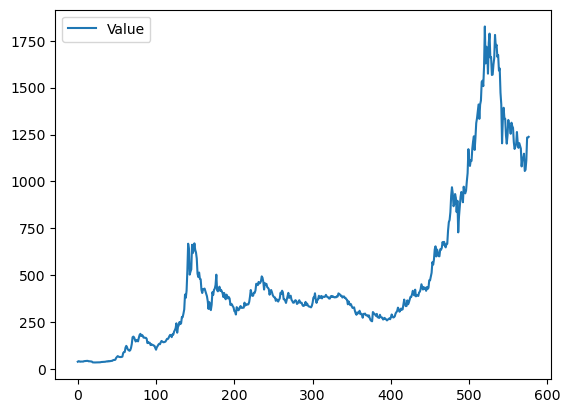

In [5]:
time.plot()
plt.show()

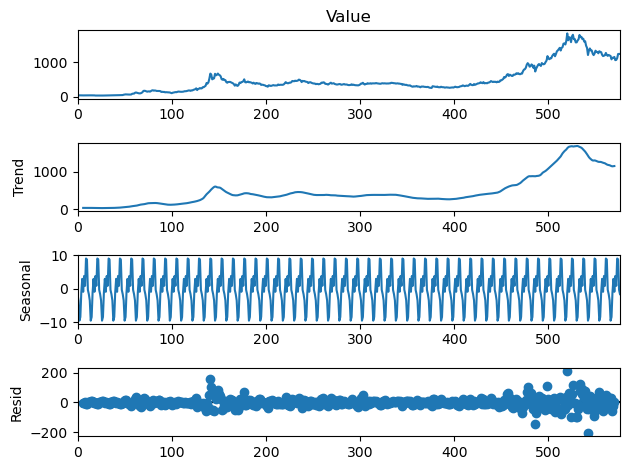

In [6]:
result = seasonal_decompose(time["Value"], model = "additive", period = 12)
result.plot()
plt.show()

In [24]:
y = time["Value"]
y_train = time["Value"][:-12]
y_test = time["Value"][-12:]

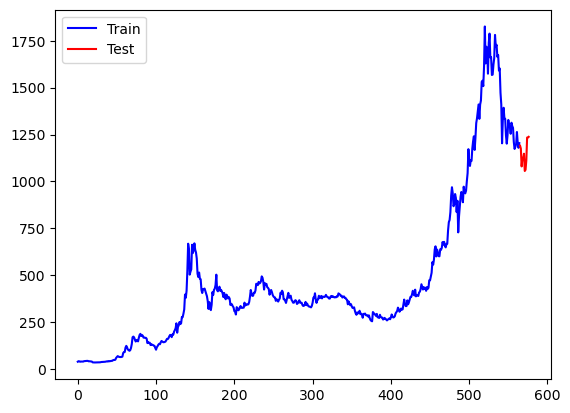

In [25]:
plt.plot(y_train, color="blue", label="Train")
plt.plot(y_test, color="red", label="Test")
plt.legend(loc="best")
plt.show()

## Central Moving Average

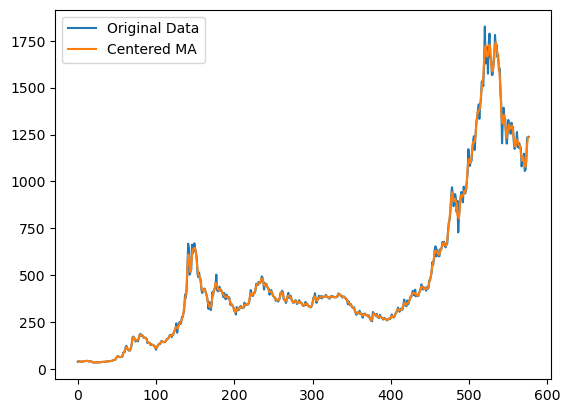

In [26]:
fcast = y.rolling(3, center=True).mean()
plt.plot(y, label = 'Original Data')
plt.plot(fcast, label = 'Centered MA')
plt.legend(loc='best')
plt.show()

## Trailing MA

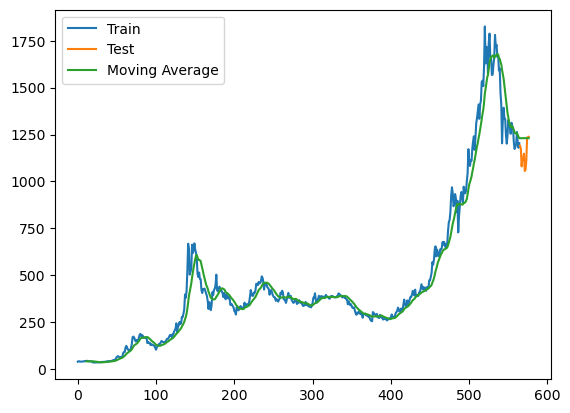

In [27]:
fcast = y_train.rolling(12).mean()
last_val = fcast.iloc[-1]
MA_series = pd.Series(last_val.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index = True)
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(MA_fcast, label = 'Moving Average')
plt.legend(loc='best')
plt.show()

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, MA_series))
print("RMSE = ", rmse)

RMSE =  103.99399121263362


## Simple Exponential Smoothing

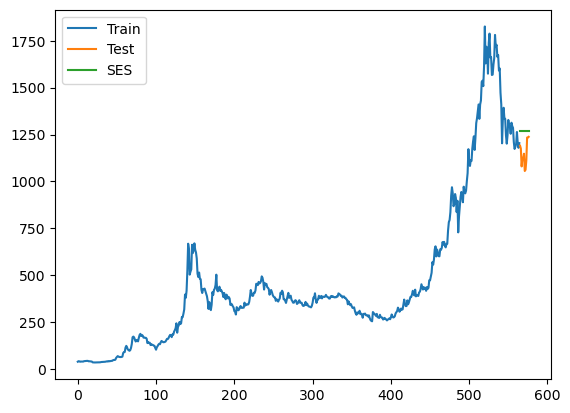

In [29]:
alpha = 0.1
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast1, label = 'SES')
plt.legend(loc='best')
plt.show()

In [30]:
rmse = np.sqrt(mean_squared_error(y_test, fcast1))
print("RMSE = ", rmse)

RMSE =  134.2605636497301


## Holt's Linear Trend

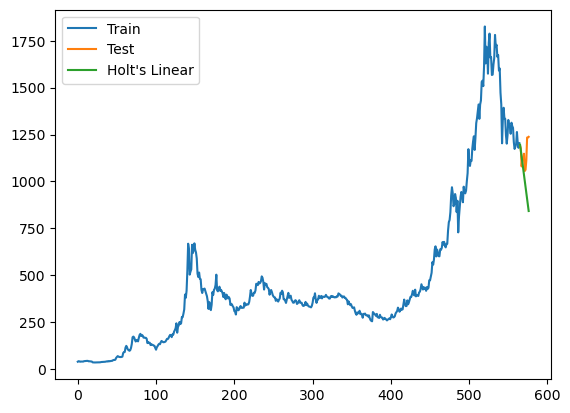

In [31]:
alpha = 0.1
beta = 0.9
fit2 = Holt(y_train).fit(smoothing_level=alpha, smoothing_trend = beta)
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's Linear")
plt.legend(loc='best')
plt.show()

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  194.3803090609198


## Exponential 

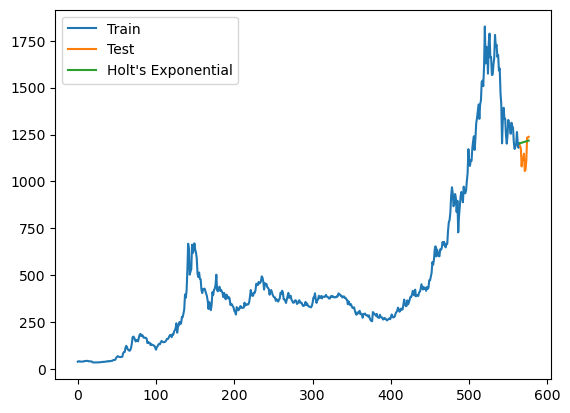

In [33]:
alpha = 0.1
beta = 0.9
fit2 = Holt(y_train, damped_trend = True, exponential = True).fit()
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's Exponential")
plt.legend(loc='best')
plt.show()

In [34]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  88.19501264206299


## Additive Trend

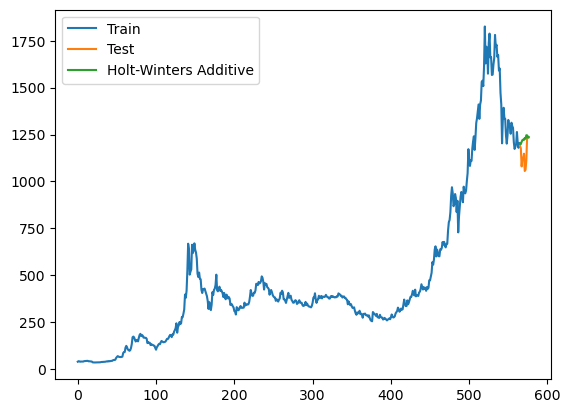

In [39]:
alpha = 0.1
beta = 0.9
phi = 0.2
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12, trend ="add", seasonal="add").fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast3, label = "Holt-Winters Additive")
plt.legend(loc='best')
plt.show()

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  99.5516411909041


## Multiplicative Trend

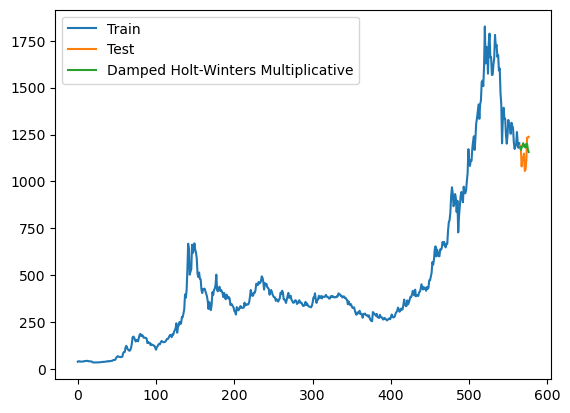

In [41]:
alpha = 0.1
beta = 0.9
phi = 0.2
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12, damped_trend = True, trend ="add", seasonal="mul").fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast3, label = "Damped Holt-Winters Multiplicative")
plt.legend(loc='best')
plt.show()

In [42]:
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  79.06026530967877
